In [47]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import zscore
import numpy as np
from scipy.stats import ttest_1samp
import seaborn as sns
from adjustText import adjust_text
from scipy.stats import pearsonr

In [ ]:
###PLOT CLUSTER NAME

def plot_cluster_name_scdata(scdata,cmap,clusters=['Neuron','Astro'],transpose=1,flipx=1,flipy=1,sbig=30,small=5):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(40, 40), facecolor="white")

    from matplotlib import pylab as plt
    x,y = (scdata.obsm['X_spatial']*[-flipx,-flipy])[:,::-transpose].T
    
    #np.unique(scdata.obs["leiden"].astype(np.int))[::-1]
    plt.scatter(x, y, c='gray', s=small, marker='.')
    i=0
    for cluster in clusters:
        cluster_ = str(cluster)
        inds = scdata.obs["cluster_names"] == cluster_
        x_ = x[inds]
        y_ = y[inds]
        col = cmap[int(i) % len(cmap)]
        i=i+1
        plt.scatter(x_, y_, c=col, s=sbig, marker='.',label = cluster_)
    
    plt.grid(False)
    plt.axis("off")
    plt.axis("equal")
    plt.legend()
    plt.tight_layout()
    return fig

In [4]:
C4 = sc.read_h5ad('C4_ref.h5ad') #######################################################################################################################

In [ ]:
#### FIGURE 1D

/Users/Olatz/anaconda3/envs/napari/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/Olatz/anaconda3/envs/napari/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/Olatz/anaconda3/envs/napari/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:381: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/Olatz/anaconda3/envs/napari/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cma

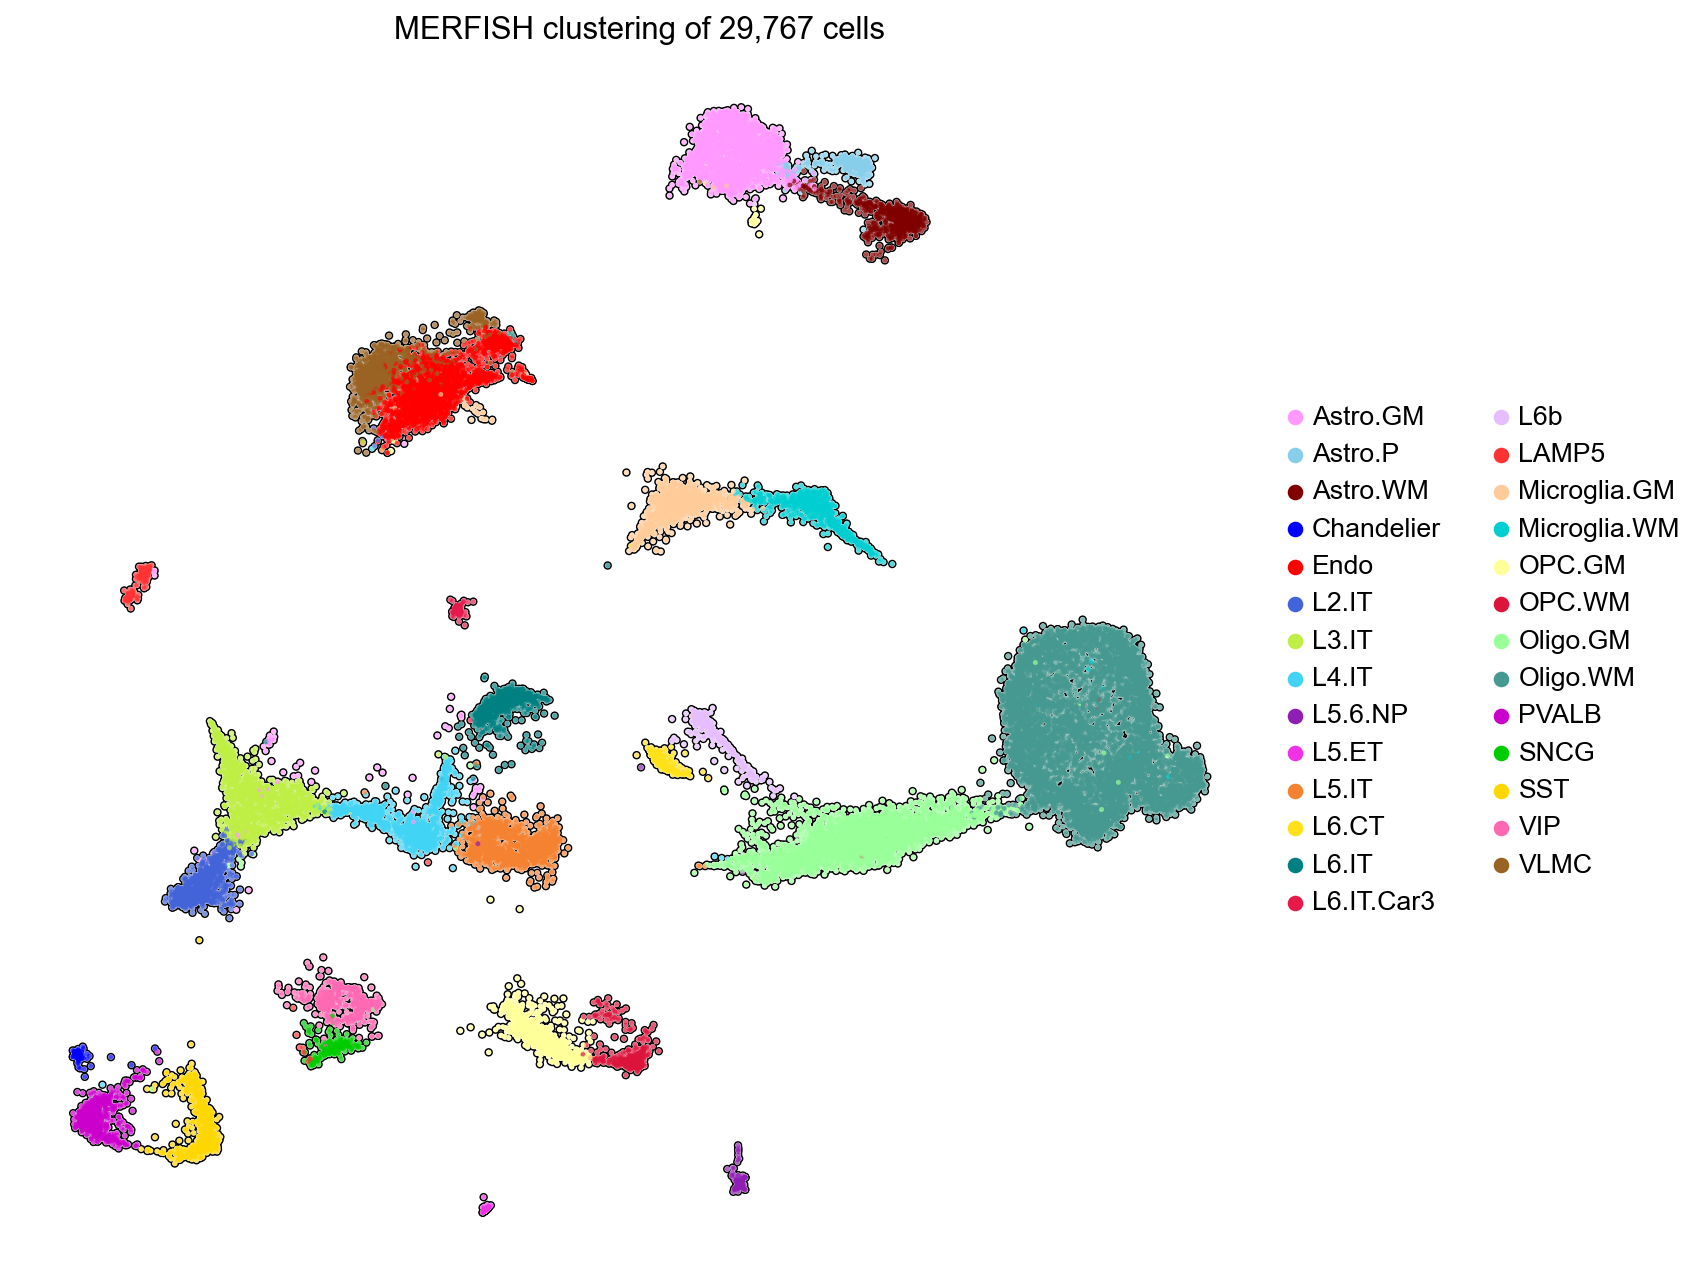

In [8]:
    cmap = [
        '#ff99ff', '#87CEEB', '#800000', #Astro GM, P, WM
        '#0000ff', #Chandelier
        '#FF0000', #Endo
        '#4363d8', '#bfef45', #L2, L3, 
        '#42d4f4',  # L4
        '#911eb4', '#f032e6','#f58231', #L56NP, L5ET, L5
        '#ffe119',  '#008080', '#e6194B', '#e6beff', #L6CT, L6, L6Car3, L6b
        '#ff3333', #LAMP5
        '#ffcc99',  '#00CED1',  '#ffff99','#DC143C', # '#20B2AA', #, #Microglia, OPC
        '#99ff99', '#469990',  #'#ADFF2F', '#00FA9A','#99ccff', #Oligo GM, WM
        '#cc00cc', #PVALB
         #Pericyte
          '#00cc00','#FFD700',   '#FF69B4', #SNCG, SST, VIP
         '#9A6324', #VLMC     
    ]

plt.style.use('default')
sc.set_figure_params(figsize=(10,10))
fig = sc.pl.umap(
    C4,
    color="cluster_names",
    add_outline=True,
    #legend_loc="on data",
    size=20,
    legend_fontsize=12,
    legend_fontoutline=1,
    frameon=False,
    title=f"MERFISH clustering of {len(C4):,d} cells",
    palette=cmap,return_fig=True
)

In [ ]:
#### FIGURE 1E

In [12]:
merged_dt=pd.read_csv('../AllenBrainAtlas/MTG_filtered.csv')
merged_dt

,gene_symbol,Lamp5,Pax6,Sncg,Vip,Sst.Chodl,Sst,Pvalb,Chandelier,L2.3.IT,...,L6.CT,L6b,L6.IT.Car3,L5.6.NP,Astro,OPC,Oligo,Endo,VLMC,Micro.PVM
0,PIK3CD,0.077312,0.000000,0.000000,0.018526,3.144687,1.121397,0.321770,0.000000,0.052362,...,0.000000,0.342513,0.000000,1.032886,0.000000,0.000000,0.000000,0.000000,0.516398,1.599939
1,WNT4,0.000000,0.300711,0.098131,0.116332,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087777,0.000000
2,LDLRAP1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.531197,0.000000,0.000000
3,MED8,0.000000,0.000000,0.000000,0.000000,0.061347,0.000000,0.000000,0.000000,1.665511,...,0.626515,0.483278,0.082215,0.207659,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,PDE4B,3.458250,9.700257,8.113090,9.547094,9.769103,8.007303,4.063421,0.092688,7.839797,...,9.789872,9.233068,2.262211,8.706653,9.732892,10.786498,11.905638,1.277929,2.391891,5.779385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,PVALB,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.777930,6.112058,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
271,PCDH11X,0.228795,7.145058,1.828613,7.553617,0.000000,8.236500,4.251611,0.000000,4.552720,...,6.836499,9.993534,5.444011,3.021610,0.000000,5.959079,0.160883,0.000000,0.000000,0.000000
272,PLP1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.021028,0.000000,0.000000,0.000000,0.000000,4.774480,12.175081,0.000000,0.000000,0.000000
273,IL1RAPL2,5.475849,8.924381,8.622897,2.262932,10.989513,0.000000,0.704482,4.501947,0.539772,...,0.000000,0.000000,0.913277,1.528573,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


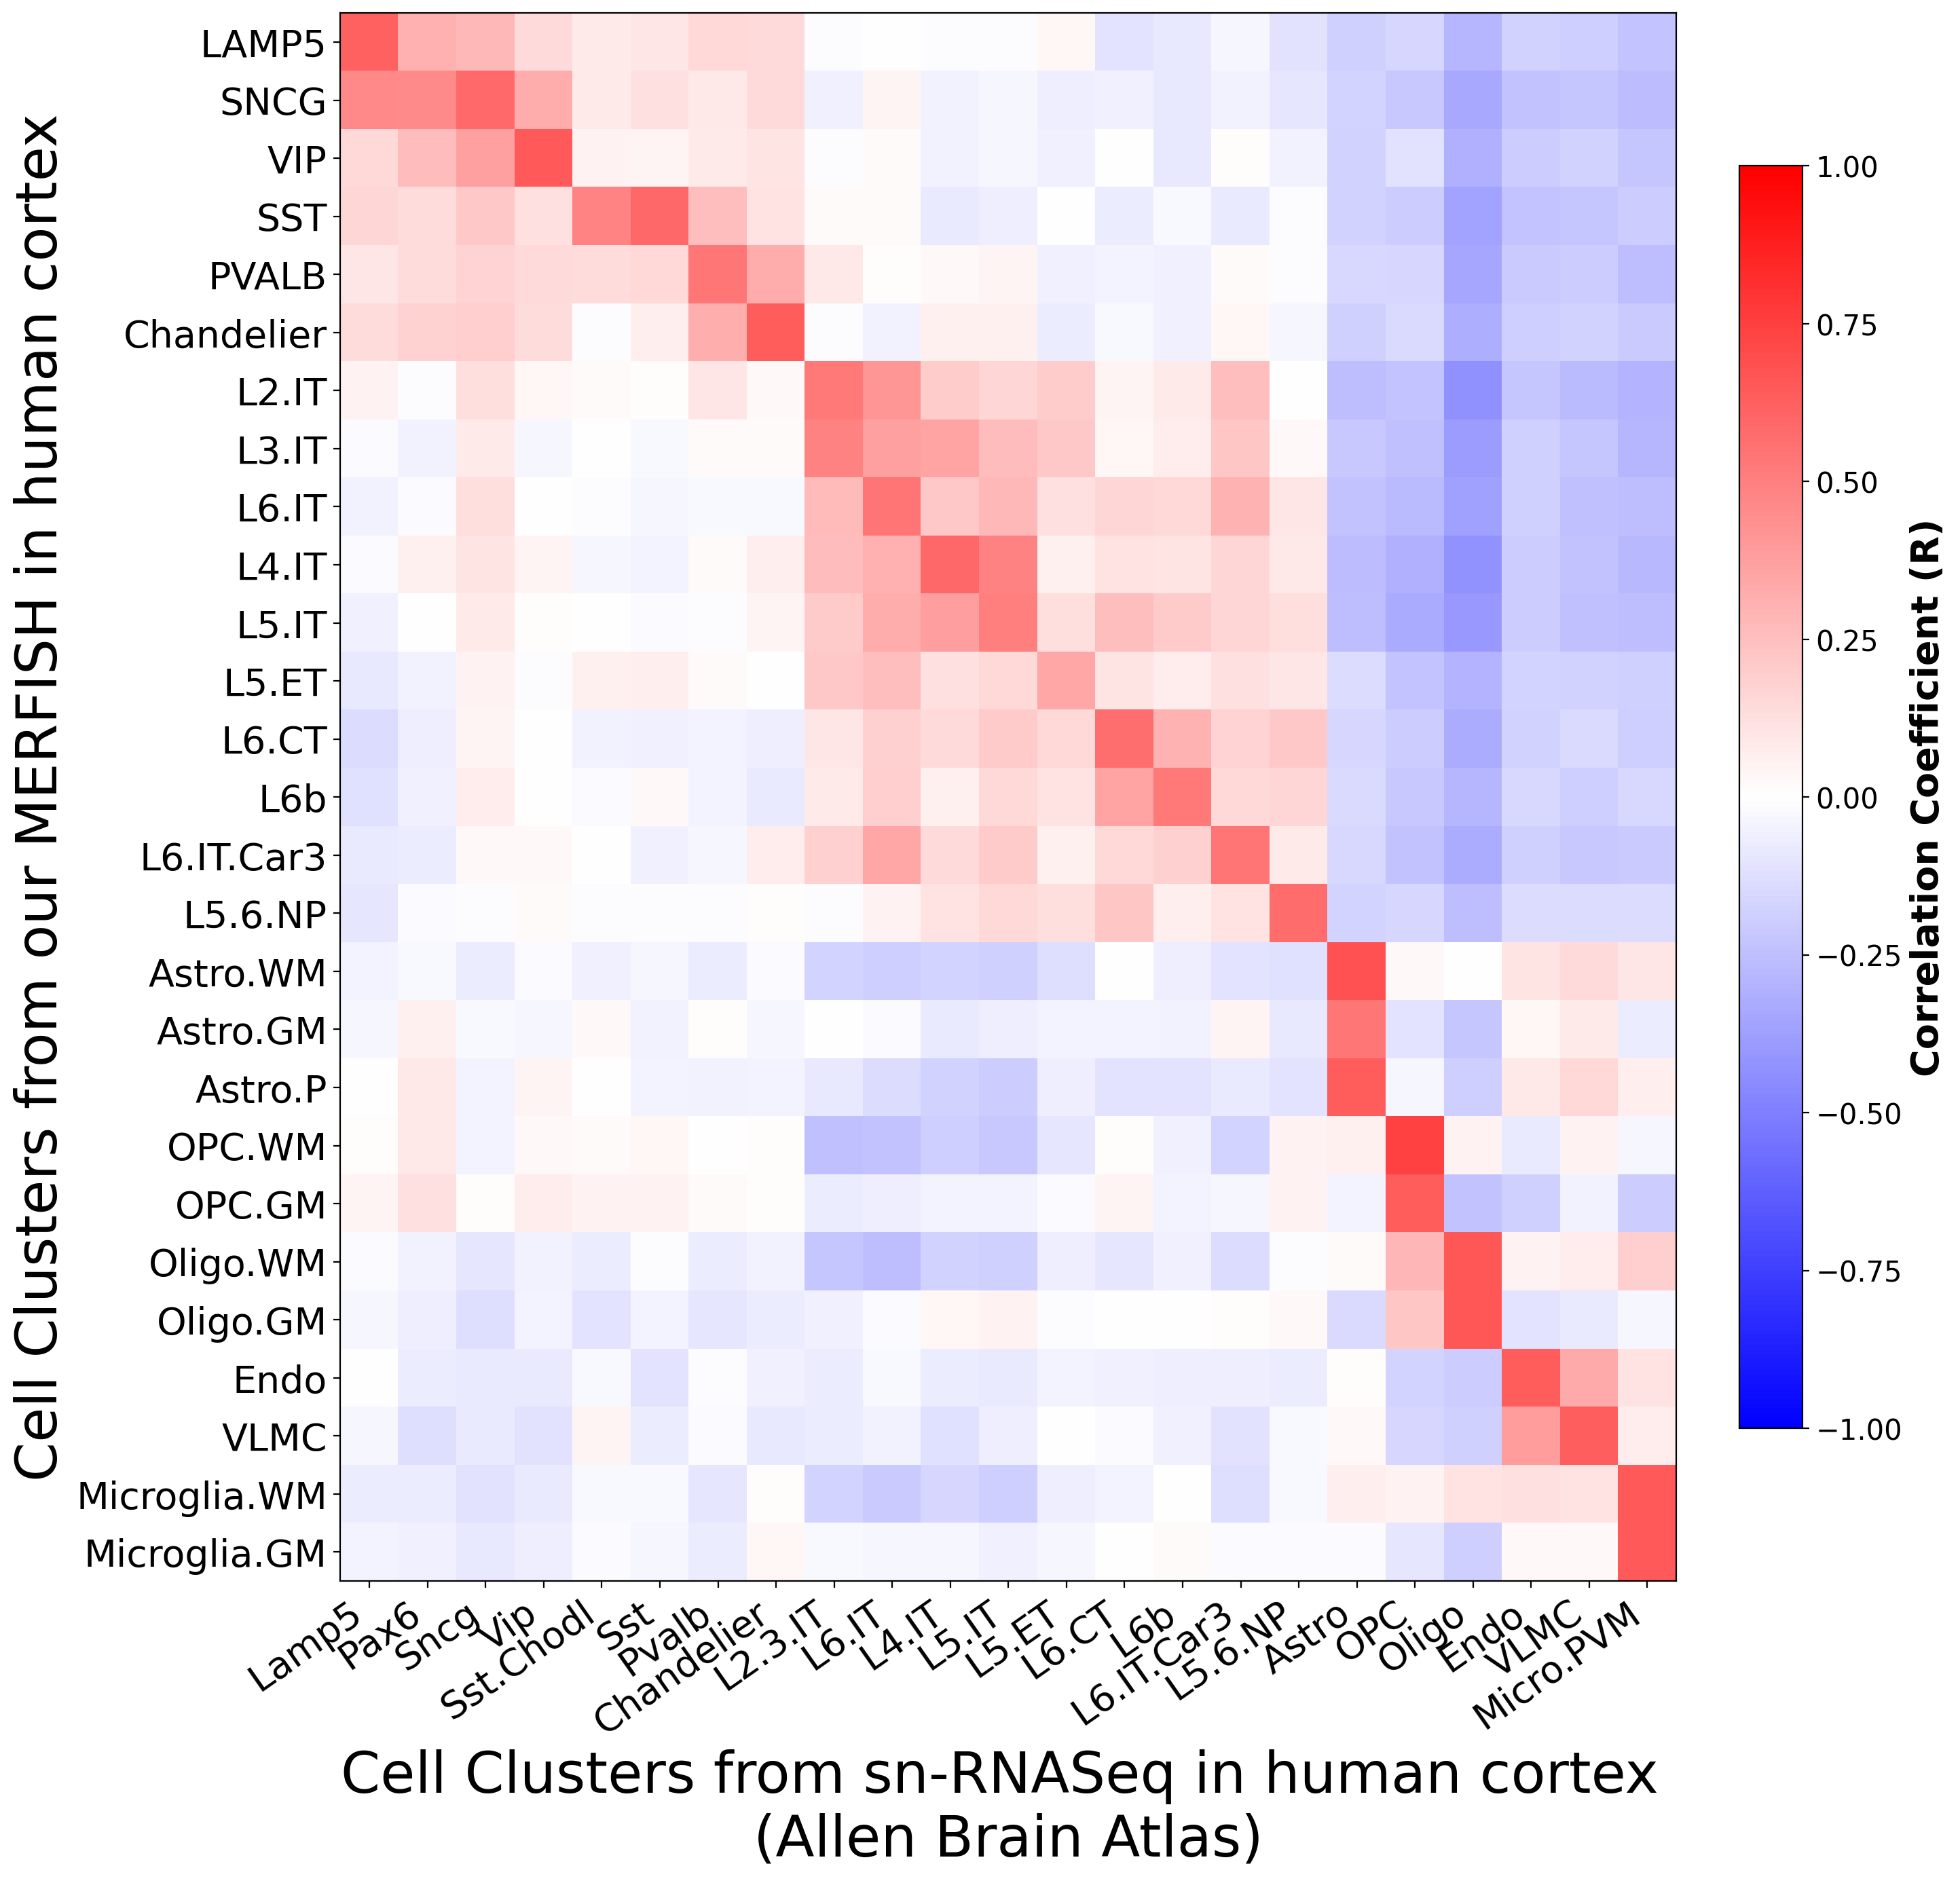

In [18]:
cluster_order = ["LAMP5", "SNCG",'VIP', "SST", "PVALB","Chandelier", "L2.IT", "L3.IT",'L6.IT', "L4.IT",'L5.IT', 'L5.ET', "L6.CT",'L6b','L6.IT.Car3', "L5.6.NP","Astro.WM", 'Astro.GM','Astro.P', 'OPC.WM','OPC.GM',  'Oligo.WM', 'Oligo.GM','Endo', 'VLMC','Microglia.WM','Microglia.GM']
C4_s = C4[:,merged_dt["gene_symbol"]]

X_MERFISH_zscored = zscore(C4_s.X,axis=0)
clusters = C4_s.obs['cluster_names']
#uclusters = np.unique(clusters)
X_MERFISH_zscored_per_cluster = np.array([np.mean(X_MERFISH_zscored[cl==clusters],axis=0) for cl in cluster_order])


X_seq = np.array(merged_dt.iloc[:,1:]).T
X_seq[np.isnan(X_seq)]=0
X_seq_zscored = zscore(X_seq,axis=0)
X_seq_zscored[np.isnan(X_seq_zscored)]=0

Mcor = [[np.corrcoef(clMER,clSEQ)[0,1] for clSEQ in X_seq_zscored] for clMER in X_MERFISH_zscored_per_cluster]
names_seq = list(merged_dt.keys())[1:]
dic_rename = dict(zip(C4_s.obs['leiden'],C4_s.obs['cluster_names']))

plt.style.use('default')
plt.figure(figsize=(30,15))
im = plt.imshow(Mcor,cmap='bwr', vmin=-1, vmax=1)
cbar = plt.colorbar(im, fraction=0.02, pad=0.02)
cbar.set_label('Correlation Coefficient (R)', fontsize=20, fontweight='bold')
cbar.ax.tick_params(labelsize=15)
plt.xticks(np.arange(len(names_seq)),names_seq,rotation=35,ha='right',size=20);
#plt.yticks(np.arange(len(uclusters)),[(ucl,dic_rename[ucl])for ucl in uclusters]);
plt.yticks(np.arange(len(cluster_order)),cluster_order,size=20)
plt.ylabel('Cell Clusters from our MERFISH in human cortex', size=30)
plt.xlabel('Cell Clusters from sn-RNASeq in human cortex \n(Allen Brain Atlas)', size=30);
plt.savefig('Figs/Fig1/Sup/allenbrainatlas_all.png',format='png',bbox_inches='tight')

In [20]:
Mcor = np.array(Mcor)

max_r = Mcor.max(axis=1)
max_idx = Mcor.argmax(axis=1)
max_allen_clusters = [names_seq[i] for i in max_idx]

results_df = pd.DataFrame({
    'MERFISH_cluster': cluster_order,
    'Max_correlation': max_r,
    'Best_matching_Allen_cluster': max_allen_clusters
})

mean_corr = np.mean(max_r)
std_corr = np.std(max_r)

t_stat, p_val = ttest_1samp(max_r.flatten(), 0)

print("===== Summary =====")
print(f"Mean correlation (all pairs): {mean_corr:.3f} ± {std_corr:.3f}")
print(f"T-test p-value (r > 0): {p_val:.5f}")
print()
print("===== Per-MERFISH Cluster Max Correlation =====")
print(results_df)


===== Summary =====
Mean correlation (all pairs): 0.589 ± 0.077
T-test p-value (r > 0): 0.00000

===== Per-MERFISH Cluster Max Correlation =====
   MERFISH_cluster  Max_correlation Best_matching_Allen_cluster
0            LAMP5         0.624990                       Lamp5
1             SNCG         0.582293                        Sncg
2              VIP         0.644174                         Vip
3              SST         0.593692                         Sst
4            PVALB         0.532252                       Pvalb
5       Chandelier         0.634577                  Chandelier
6            L2.IT         0.520574                     L2.3.IT
7            L3.IT         0.490213                     L2.3.IT
8            L6.IT         0.545990                       L6.IT
9            L4.IT         0.588152                       L4.IT
10           L5.IT         0.502985                       L5.IT
11           L5.ET         0.344548                       L5.ET
12           L6.CT     

In [ ]:
#### FIGURE S2 B

In [ ]:
marker_genes = [
'LAMP5','CXCL14','VIP','SST','SLIT2','RYR1',
    'LINC00507','CUX2', #(L2-3)
    'C1QL3','RORB','PFKP','AHNAK2','FOXP2','HS3ST4','SATB2','HTR2C', #'FEZF2' Layer 56NP, 'HS3ST4'(6CT, 6b, 56NP), 
    'AQP4','PDGFRA','OPALIN','FLT1','ACTA2','SLC6A12','CSF1R'
]

data_matrix = pd.DataFrame(
    C4[:, marker_genes].X.toarray(), 
    index=C4.obs['cluster_names'],
    columns=marker_genes
).groupby('cluster_names').mean().reindex(cluster_order)

# Normalize each gene to range 0-1
data_matrix_normalized = data_matrix.divide(data_matrix.max(axis=0), axis=1)

# Generate heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(
    data_matrix_normalized.T,  # Transposed to match `swap_axes=True`
    cmap='coolwarm',
    cbar_kws={'label': 'Normalized Mean Expression (0-1)'},
    linewidths=0.5, 
    linecolor='white'
)

# Customizing labels
#plt.title(f'Patient {patient}', fontsize=30)
plt.xticks(rotation=35, fontsize=20, ha='right')
plt.yticks(fontsize=20)

plt.xlabel("Clusters", fontsize=30)
plt.ylabel("Marker Genes", fontsize=30)

plt.show()

In [ ]:
plot_gene_scdata(C4,gene='CUX2',nmax=30,sz_min=0.5,sz_max=8,transpose=-1,flipx=1,flipy=1,tag='X_spatial');
plot_gene_scdata(C4,gene='RORB',nmax=55,sz_min=0.5,sz_max=8,transpose=-1,flipx=1,flipy=1,tag='X_spatial');
plot_gene_scdata(C4,gene='PFKP',nmax=200,sz_min=0.5,sz_max=8,transpose=-1,flipx=1,flipy=1,tag='X_spatial');
plot_gene_scdata(C4,gene='AHNAK2',nmax=80,sz_min=0.5,sz_max=8,transpose=-1,flipx=1,flipy=1,tag='X_spatial');
plot_gene_scdata(C4,gene='HTR2C',nmax=25,sz_min=0.5,sz_max=8,transpose=-1,flipx=1,flipy=1,tag='X_spatial');
plot_gene_scdata(C4,gene='C1QL3',nmax=80,sz_min=0.5,sz_max=8,transpose=-1,flipx=1,flipy=1,tag='X_spatial');
plot_gene_scdata(C4,gene='FOXP2',nmax=20,sz_min=0.5,sz_max=8,transpose=-1,flipx=1,flipy=1,tag='X_spatial');
plot_gene_scdata(C4,gene='HS3ST4',nmax=50,sz_min=0.5,sz_max=8,transpose=-1,flipx=1,flipy=1,tag='X_spatial');
plot_gene_scdata(C4,gene='SATB2',nmax=60,sz_min=0.5,sz_max=8,transpose=-1,flipx=1,flipy=1,tag='X_spatial');

In [ ]:
#### FIGURE S2C

In [ ]:
cmap = [
    '#4363d8', '#bfef45', #L2, L3, 
    '#42d4f4', # L4 '#FF6347','#FF6347','#FF6347', #L4.5,
    '#911eb4', '#f032e6','#f58231', #L56NP, L5ET, L5
    '#ffe119','#008080',    '#e6194B','#e6beff', #L6CT, L6, L6Car3, L6b
]

cmap = [
    '#4363d8', '#bfef45', #L2, L3, 
]
plot_cluster_name_scdata(C4,cmap,clusters=['L2.IT','L3.IT'],transpose=-1,flipx=1,flipy=1,sbig=200,small=5);
cmap = [
    '#42d4f4', # L4 '#FF6347','#FF6347','#FF6347', #L4.5,
]
plot_cluster_name_scdata(C4,cmap,clusters=['L4.IT'],transpose=-1,flipx=1,flipy=1,sbig=200,small=5);
cmap = [
    '#f58231', #L5
]
plot_cluster_name_scdata(C4,cmap,clusters=['L5.IT'],transpose=-1,flipx=1,flipy=1,sbig=200,small=5);
cmap = [
    '#911eb4' #L56NP, L5ET, L5
]
plot_cluster_name_scdata(C4,cmap,clusters=['L5.6.NP'],transpose=-1,flipx=1,flipy=1,sbig=200,small=5);
cmap = [
   '#008080' #L6,
]
plot_cluster_name_scdata(C4,cmap,clusters=['L6.IT'],transpose=-1,flipx=1,flipy=1,sbig=200,small=5);


In [ ]:
#### FIGURE 1F

In [22]:
counts = sc.read_h5ad('../SEAAD_PFC/SEAAD_A9_RNAseq_final-nuclei.2024-02-13.h5ad')

In [24]:
counts.obs['Neurotypical reference'] = counts.obs['Neurotypical reference'].astype(str).map({'True': True, 'False': False})

In [25]:
CTL=counts[counts.obs['Neurotypical reference']==True].copy()

In [26]:
concatenated_adata_f_AGG=sc.read_h5ad('../HD_Analysis/adata_0803_0908_f_AGG_orig.h5ad')

In [27]:
concatenated_adata_f_AGG=concatenated_adata_f_AGG[concatenated_adata_f_AGG.obs['HD']==False].copy()

In [48]:
cluster_map = {
    'L2.IT': 'L2/3 IT',
    'L3.IT': 'L2/3 IT',
    'L4.IT': 'L4 IT',
    'L5.IT': 'L5 IT',
    'L5.ET': 'L5 ET',
    'L5.6.NP': 'L5/6 NP',
    'L6.IT': 'L6 IT',
    'L6.Car3': 'L6 IT Car3',
    'L6.CT': 'L6 CT',
    'L6b': 'L6b',
    'SST': 'Sst',
    'PVALB': 'Pvalb',
    'VIP': 'Vip',
    'LAMP5': 'Lamp5',
    'Chandelier': 'Chandelier',
    'SNCG': 'Sncg',
    'Astro.P': 'Astrocyte', 
    'Astro.WM': 'Astrocyte', 
    'Astro.GM': 'Astrocyte',
    'Oligo.WM': 'Oligodendrocyte',
    'Oligo.GM': 'Oligodendrocyte',
    'OPC': 'OPC',
    'Endo': 'Endothelial',
    'VLMC': 'VLMC',
    'Microglia': 'Microglia-PVM',
}

In [49]:
# Remap cluster names for concatenated_adata_f_AGG
concatenated_adata_f_AGG.obs['mapped_cluster'] = concatenated_adata_f_AGG.obs['cluster_names'].map(cluster_map).fillna(concatenated_adata_f_AGG.obs['cluster_names'])

In [50]:
concatenated_adata_f_AGG.obs['mapped_cluster'].unique()

array(['L5 ET', 'L5 IT', 'Oligodendrocyte', 'L6 IT Car3', 'L6 IT', 'OPC',
       'L6b', 'L2/3 IT', 'Sst', 'L4 IT', 'Pvalb', 'L6 CT', 'Astrocyte',
       'L5/6 NP', 'Sncg', 'Vip', 'Lamp5', 'VLMC', 'Microglia-PVM',
       'Endothelial', 'Chandelier', 'Pericyte'], dtype=object)

In [51]:
agg_expr = (
    pd.DataFrame(concatenated_adata_f_AGG[:, ['HTT']].X.toarray(),
                 index=concatenated_adata_f_AGG.obs['mapped_cluster'])
    .groupby(level=0).mean()
)
agg_expr.columns = ['HTT']


ctl_expr = (
    pd.DataFrame(CTL[:, ['HTT']].X.toarray(),
                 index=CTL.obs['Subclass'])
    .groupby(level=0).mean()
)
ctl_expr.columns = ['HTT']


/var/folders/7p/t1dymgvj689ffh7fbygsmbzc0000gp/T/ipykernel_41934/436750491.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame(CTL[:, ['HTT']].X.toarray(),


In [52]:
common_clusters = agg_expr.index.intersection(ctl_expr.index)

agg_expr = agg_expr.loc[common_clusters]
ctl_expr = ctl_expr.loc[common_clusters]

In [53]:
common_clusters

Index(['Astrocyte', 'Chandelier', 'Endothelial', 'L2/3 IT', 'L4 IT', 'L5 ET',
       'L5 IT', 'L5/6 NP', 'L6 CT', 'L6 IT', 'L6 IT Car3', 'L6b', 'Lamp5',
       'Microglia-PVM', 'OPC', 'Oligodendrocyte', 'Pvalb', 'Sncg', 'Sst',
       'VLMC', 'Vip'],
      dtype='object')

In [54]:
rho, pval = pearsonr(
    agg_expr.squeeze().values,
    ctl_expr.squeeze().values
)

/Users/Olatz/anaconda3/envs/napari/lib/python3.9/site-packages/matplotlib/text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/Users/Olatz/anaconda3/envs/napari/lib/python3.9/site-packages/matplotlib/text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/Users/Olatz/anaconda3/envs/napari/lib/python3.9/site-packages/matplotlib/text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/Users/Olatz/anaconda3/envs/napari/lib/python3.9/site-packages/matplotlib/text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a Type

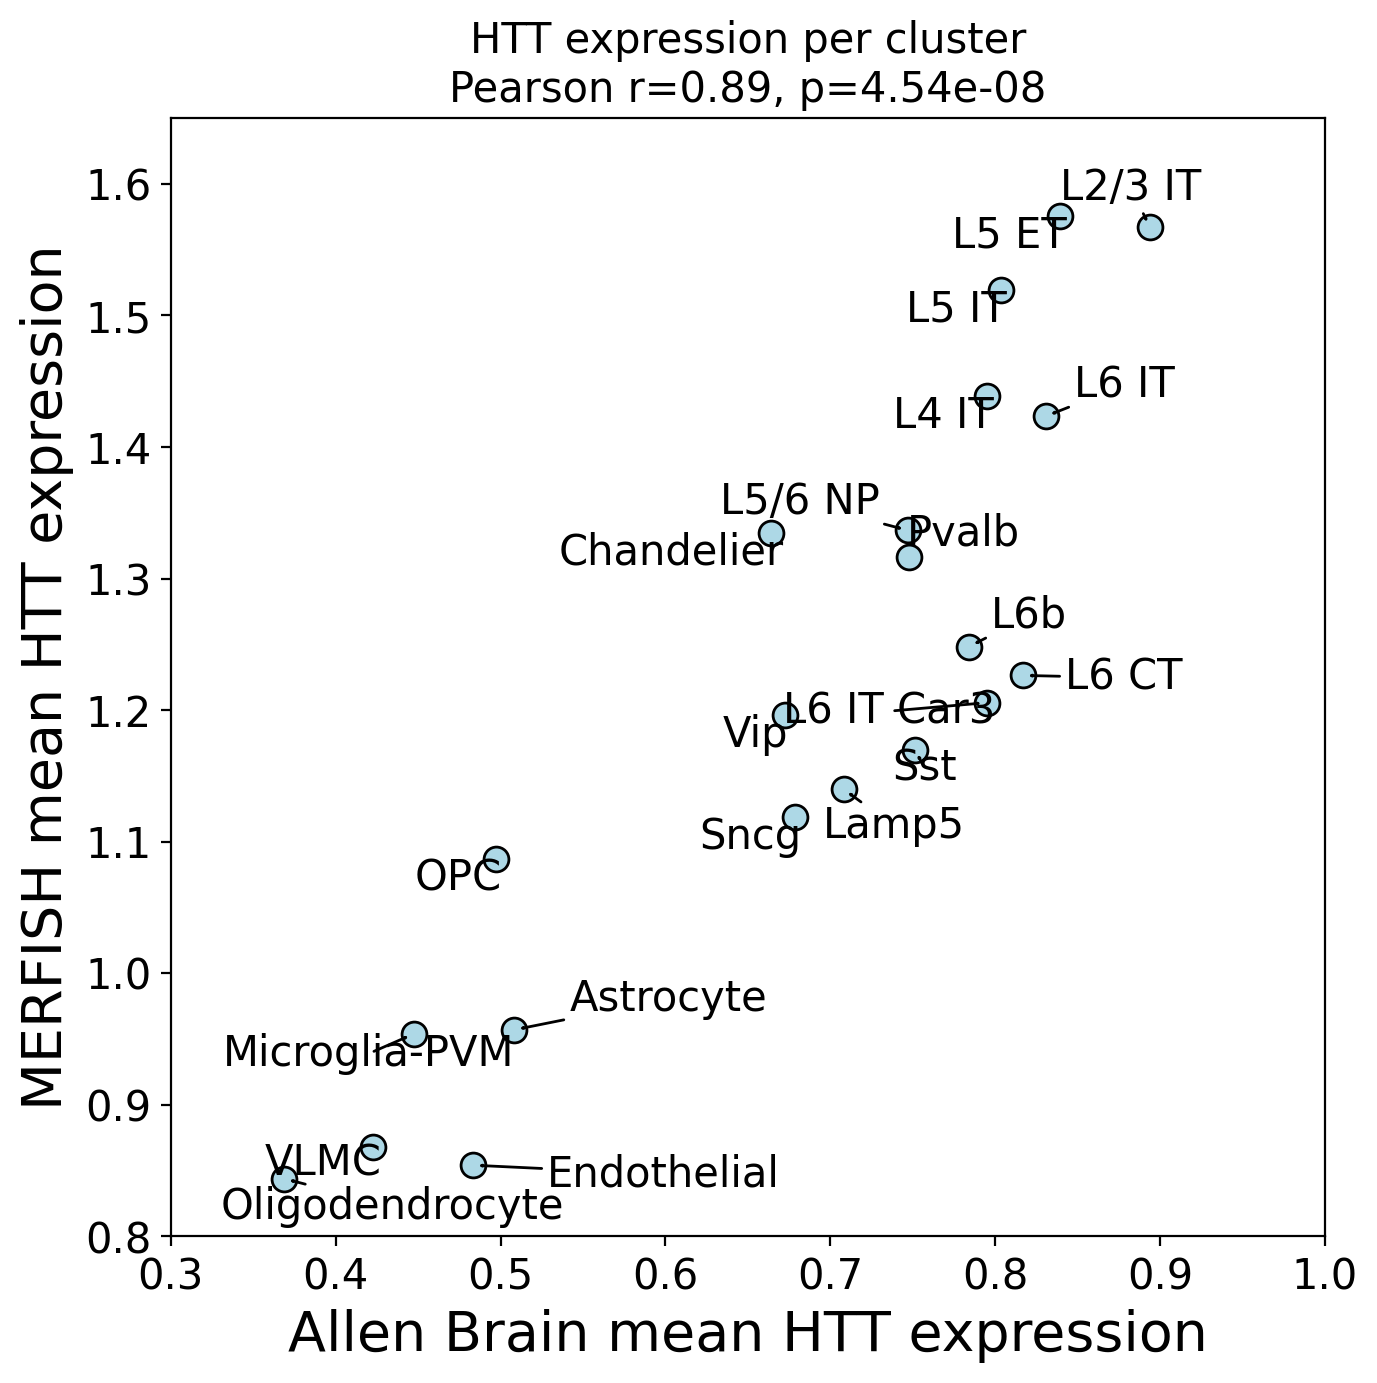

In [56]:
plt.figure(figsize=(7,7))
plt.scatter(
    ctl_expr.values,
    agg_expr.values,
    c='lightblue',
    s=80,
    edgecolor='black'
)

texts = []
for c in ctl_expr.index:
    texts.append(
        plt.text(
            ctl_expr.loc[c],
            agg_expr.loc[c],
            c,
            fontsize=15
        )
    )

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))

plt.ylabel('MERFISH mean HTT expression', size=20)
plt.xlabel('Allen Brain mean HTT expression', size=20)
plt.title(f'HTT expression per cluster\nPearson r={rho:.2f}, p={pval:.2e}', size=15)

#plt.axline((0,0), slope=1, color='gray', linestyle='--')
plt.xlim(0.3, 1)
plt.ylim(0.8, 1.65)

plt.xticks(size=15)
plt.yticks(size=15)
plt.tight_layout()
plt.show()
